# Import Library & Data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read data
df = pd.read_csv('train.csv')

# Melihat isi dari dataframe
print(df)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

# Melihat Jenis Variabel

In [2]:
# Syntax untk melihat jenis variabel
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Berdasarkan pada sumber data https://www.kaggle.com/c/titanic/data pada Data Dictionary, diperoleh penjelasan variabel sebagai berikut:
1. PassengerID: Merupakan urutan identitas penumpang nilai integer dari 1 hingga ke n.
2. Survived: Merupakan variabel yang menyatakan apakah record/observasi/pengamatan selamat dari kejadian. Hal ini menunjukkan bahwa variabel Survived merupakan variabel binary yang dapat dijelaskan secara kategori saja (Variabel Nominal).
3. Pclass: Merupakan kelas tiket penumpang, dimana 1 mengindikasikan bahwa penumpang tersebut berada pada 1st class, 2 untuk 2nd class, dan 3 adalah 3rd class dengan kelas tertinggi paad 1st class. Dari hal ini, maka dapat disebutkan bahwa variabel ini merupakan variabel ordinal karena bertingkat.
4. Name: Merupakan variabel yang berisikan nama penumpang. Termasuk variabel nominal.
5. Sex: Merupakan variabel yang berisikan jenis kelamin penumpang. Variabel ini termasuk variabel nominal karena dapat dikategorikan.
6. Age: Merupakan variabel yang berisi umur dari penumpang. Variabel ini termasuk skala rasio.
7. SibSp: Merupakan variabel yang menyatakan jumlah Siblings/Spouses yang naik Titanic. Skala data pada variabel "sibsp" yang merepresentasikan jumlah saudara kandung/pasangan yang ada di kapal Titanic adalah skala rasio.
8. Parch: Jumlah keluarga/anak yang ada di kapal Titanic. Skala data pada variabel ini yang merepresentasikan jumlah keluarga/anak yang ada di kapal Titanic adalah skala data rasio.
9. Ticket: Merupakan variabel yang menyatakan nomor tiket untuk penumpang kapal Titanic. Variabel ini juga merupakan variabel dengan skala nominal.
10. Fare: Merupakan variabel yang menjelaskan biaya atau tarif yang dikeluarkan penumpang untuk naik kapal Titanic. Variabel ini termasuk variabel dengan skala rasio.
11. Cabin: Merupakan variabel yang menyatakan nomor kabin penumpang kapal Titanic. Variabel ini juga merupakan variabel dengan skala nominal.
12. Embarked: Merupakan variabel yang menyatakan port tempat penumpang naik kapal Titanic. Variabel ini juga merupakan variabel dengan skala nominal.

# Pembagian Data Kategorik dengan Numerik
Berdasarkan pada penjelasan di atas, maka dapat disimpulkan bahwa variabel yang termasuk kategorik adalah sebagai berikut:
1. PassengerID (Nominal)
2. Survived (Nominal)
3. Pclass (Ordinal)
4. Name (Nominal)
5. Sex (Nominal)
6. Ticket (Nominal)
7. Cabin (Nominal)
8. Embarked (Nominal)

Sedangkan, variabel yang termasuk numerik adalah sebagai berikut:
1. Age (Ratio Diskrit)
2. SibSp (Ratio Diskrit)
3. Parch (Ratio Diskrit)
4. Fare (Ratio Kontinyu)

Dalam hal ini, kita lakukan standarisasi data dengan mengubah variabel ke jenis yang sesuai untuk variabel yang belum sesuai dengan jenisnya, seperti "Sex" yang masih berupa string menjadi variabel kategorik dengan encoding.

In [4]:
# Pembagian data categorical dan numerical
df_cat = df[['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']].copy()
print(df_cat)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex  \
0                              Braund, Mr. Owen Harris    male   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female   
2                               Heikkinen, Miss. Laina  female   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female   
4                             Allen, Mr. William Henry    male   
..                                                 ...     ...   
886                              Montvila, Rev. Juozas    male   
887            

In [5]:
df_num = df[['Age', 'SibSp', 'Parch', 'Fare']].copy()
print(df_num)

      Age  SibSp  Parch     Fare
0    22.0      1      0   7.2500
1    38.0      1      0  71.2833
2    26.0      0      0   7.9250
3    35.0      1      0  53.1000
4    35.0      0      0   8.0500
..    ...    ...    ...      ...
886  27.0      0      0  13.0000
887  19.0      0      0  30.0000
888   NaN      1      2  23.4500
889  26.0      0      0  30.0000
890  32.0      0      0   7.7500

[891 rows x 4 columns]


# Diagram Bar plot

## Diagram Bar plot untuk variabel Survived

### Bar plot vertical

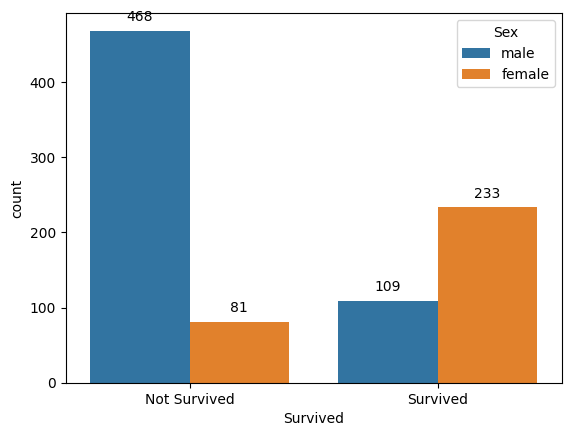

In [24]:
# Membuat barplot untuk variabel 'Survived' dari data 'df_cat' yang dibedakan berdasarkan 'Sex'
ax = sns.countplot(x = 'Survived', data = df_cat, hue = "Sex")
# Mengset label x dengan 0 = Not Survived, dan 1 adalah Survived
ax.set_xticklabels(['Not Survived', 'Survived'])
# Mengatur label pada tiap bar dengan nilai yang sesuai dengan ketinggian bar dengan looping untuk tiap bar ('patches')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

### Bar plot horizontal

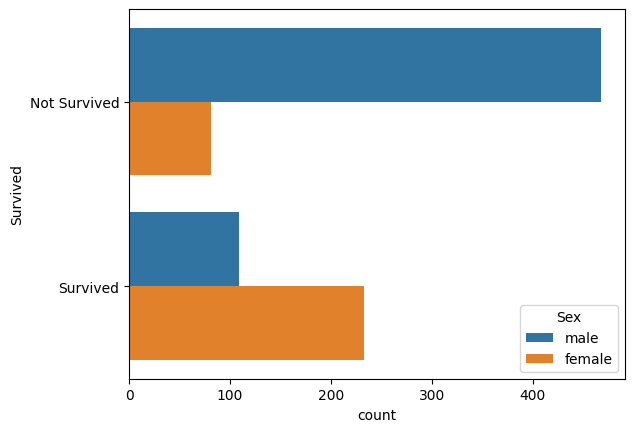

In [29]:
# Membuat barplot untuk variabel 'Survived' dari data 'df_cat' yang dibedakan berdasarkan 'Sex'
ax = sns.countplot(y = 'Survived', data = df_cat, hue = "Sex")
# Mengset label x dengan 0 = Not Survived, dan 1 adalah Survived
ax.set_yticklabels(['Not Survived', 'Survived'])
plt.show()

## Diagram Bar plot untuk variabel Gender

## Diagram Bar plot untuk variabel Pclass

## Diagram Bar plot untuk variabel Cabin

## Diagram Bar plot untuk variabel Embarked